In [2]:
!pip install nltk
import nltk

You should consider upgrading via the 'c:\users\clasa215b_nt17\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CLASA215B_NT17\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CLASA215B_NT17\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('en_reviews.csv', encoding='latin1')

In [7]:
df

,confidence,is_good,evaluation,text
0,4.0,1,1,- The article addresses a contingent and very ...
1,4.0,1,1,The article presents practical recommendations...
2,5.0,1,1,- The theme is very interesting and a guide ca...
3,4.0,1,2,An experience of use of ICT for academic colla...
4,4.0,1,2,NaN
...,...,...,...,...
383,5.0,0,-1,The work aims to offer a vision of the use of ...
384,4.0,0,-1,The paper is well written and easy to read.It ...
385,4.0,0,-1,Background observation: An example of implemen...
386,3.0,1,1,A procedure for elaborating state machines wit...


In [8]:
df = df.dropna()

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin

In [10]:
class TextNormalizer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
        
    def transform(self, X, y=None):
        X_copy = X.copy()
        for i in range(len(X_copy)):
            X_copy[i] = str(X_copy[i]).lower()
            X_copy[i] = X_copy[i].replace('\n',' ')
            X_copy[i] = X_copy[i].replace('\r',' ')
            X_copy[i] = X_copy[i].strip()
        return X_copy

In [11]:
X = df['text'].values
y = df['is_good'].values

In [12]:
X

array(['- The article addresses a contingent and very relevant problem, and includes both a national diagnosis of use of good practices and a solution (good concrete practices).- The language is adequate.- The article feels like the concatenation of three different articles: (1) results of a survey, (2) good security practices, (3) incorporation of good practices.- The order of the sections would be better if it reflects this order (the revised version is # 2, # 1, # 3).- The article has no validation of any kind, not even by evaluation of experts.',
       'The article presents practical recommendations for the development of safe software.The best best practices are described to develop software that is proactive before attacks, and a cost analysis of these software development practices is performed.Everything based on a review of practices proposed in the literature and its contrast with data obtained from a business survey.Finally, a guide is recommended.It would be ideal to apply

In [13]:
text_normalizer =TextNormalizer()
text_normalizer.fit(X)
text_normalizer.transform(X)

array(['- the article addresses a contingent and very relevant problem, and includes both a national diagnosis of use of good practices and a solution (good concrete practices).- the language is adequate.- the article feels like the concatenation of three different articles: (1) results of a survey, (2) good security practices, (3) incorporation of good practices.- the order of the sections would be better if it reflects this order (the revised version is # 2, # 1, # 3).- the article has no validation of any kind, not even by evaluation of experts.',
       'the article presents practical recommendations for the development of safe software.the best best practices are described to develop software that is proactive before attacks, and a cost analysis of these software development practices is performed.everything based on a review of practices proposed in the literature and its contrast with data obtained from a business survey.finally, a guide is recommended.it would be ideal to apply

In [14]:
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import StemmerI
from nltk.tokenize import word_tokenize

In [15]:
class WordExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, language, tokenize):
        self.language = language
        self.stopwords = stopwords.words(self.language)
        self.tokenize = tokenize
        
    def fit(self, X, y=None):
        general_freq = FreqDist()
        for txt in X:
            freq_dist = FreqDist(self.tokenize(txt))
            general_freq.update(freq_dist)
        self.hapaxes = general_freq.hapaxes()
        return self
    
    def transform(self, X, y=None):
        X_copy = X.copy()
        for i in range(len(X_copy)):
            X_copy[i] = ' '.join([token for token in self.tokenize(X_copy[i])
                            if token not in self.stopwords and
                            token not in self.hapaxes])
        return X_copy

In [16]:
class ApplyStemmer(BaseEstimator, TransformerMixin):
    def __init__(self, stemmer, tokenize):
        self.stemmer = stemmer
        self.tokenize = tokenize
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_copy = X.copy()
        for i in range(len(X_copy)):
            X_copy[i] = ' '.join([self.stemmer.stem(token)
                                  for token in self.tokenize(X_copy[i])])
        return X_copy

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression 
from nltk.stem import PorterStemmer


In [20]:
pipe = Pipeline([
    ('Normalization', TextNormalizer()),
    ('Word Extraction', WordExtractor('english', word_tokenize)),
    ('Apply Stemmer', ApplyStemmer(PorterStemmer(), word_tokenize)),
    ('Vectorization', CountVectorizer()),
    ('Model', LogisticRegression())
])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('Normalization', TextNormalizer()),
                ('Word Extraction',
                 WordExtractor(language='english',
                               tokenize=<function word_tokenize at 0x0000020A1E319EE8>)),
                ('Apply Stemmer',
                 ApplyStemmer(stemmer=<PorterStemmer>,
                              tokenize=<function word_tokenize at 0x0000020A1E319EE8>)),
                ('Vectorization', CountVectorizer()),
                ('Model', LogisticRegression())])

In [23]:
y_pred = pipe.predict(X_test)

In [24]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [25]:
accuracy_score(y_pred, y_test)

0.6631578947368421

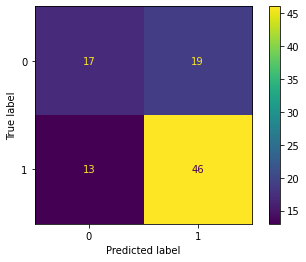

In [26]:
plot_confusion_matrix(pipe, X_test, y_test)

In [27]:
import pickle

In [28]:
pickle.dump(pipe, open('pipe.pkl','wb'))